In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
import re

In [2]:
shark = pd.read_csv(r"C:/Users/Marco/Desktop/IronHack/projects/Project_1/data/attacks.csv", encoding='latin1')


def clean(shark):
    
    shark.dropna(subset=['Year', 'Time', 'Sex ', 'Activity', 'Fatal (Y/N)', 'Injury'], inplace=True)
#eliminating all the missing values from the columns i will use
    shark.rename(columns={'Sex ': 'Sex'}, inplace=True)
#changing the sex column name because it had an unnecessary space at the end
    used_columns = ['Year', 'Time', 'Sex', 'Activity', 'Fatal (Y/N)', 'Injury']
    shark_columns = shark[used_columns]
#creating a new data frame with only the columns i need for my investigation
    shark_columns = shark_columns[shark_columns['Year'] > 1000] 
#I am taking out any year that is smaller than 1000 to take out from the year column wrong data

#to now do all the cleaning loc function is required to not;
#the original data set and to not get the error 'setting with copy warning'

    shark_columns.loc[shark['Sex'].isin(['M', 'F']), 'Sex'] = shark_columns['Sex'].replace({'M': 'Male', 'F': 'Female'})
#changing the original dataframe, to make it more readable i change the f by female and M by Male

    shark_columns.loc[:, 'Activity'] = shark_columns['Activity'].str.lower()
#making all the answers of the activity column with no capitalaized letters in case there are any irregularities
    shark_columns.loc[:, 'Activity'] = shark_columns['Activity'].str.lower()
#making all the answers of the activity column with no capitalaized letters in case there are any irregularities

    shark_columns_copy = shark_columns.copy()
    shark_columns_copy['Year'] = shark_columns_copy['Year'].astype(str).str.split('.').str[0].astype(int)
#creating a copy due to error of modifying the original data frame
#converting all the data in the year column into integrers

    data = shark_columns_copy
    
    time_column_dtype = data['Time'].dtypes
    time_column_dtype
    
    data['Time'] = data['Time'].str.extract(r'(\d{1,2}:\d{1,2}|\d{1,2}h\d{1,2})', expand=False)
#I extracted the wrong data of the data frame in the column time and just keeping an exact time give in the format hhmm

    data.dropna(subset=['Time'], inplace=True)
#we now take out the mssing values
    
    return data
    
df = clean(shark)

In [3]:
df

,Year,Time,Sex,Activity,Fatal (Y/N),Injury
0,2018,18h00,Female,paddling,N,"No injury to occupant, outrigger canoe and pad..."
1,2018,14h00,Female,standing,N,Minor injury to left thigh
2,2018,07h45,Male,surfing,N,Injury to left lower leg from surfboard skeg
8,2018,17h00,Male,walking,N,Lower left leg bitten
9,2018,14h00,Male,standing,N,Minor injury to foot
...,...,...,...,...,...,...
6021,1852,01h50,Male,wreck of the steamship birkenhead,Y,FATAL. All of the women & children on board su...
6065,1841,14h00,Male,bathing,Y,FATAL
6091,1830,17h00,Male,bathing,Y,FATAL
6105,1826,19h00,Male,jumped overboard,Y,FATAL


<h2>Which gender is tastier?


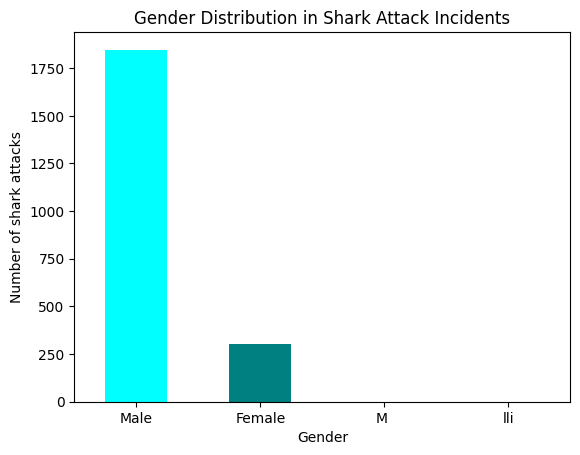

"\nAfter plotting the data we see it was not completly clean.\nthere are two answers that had to be cleaned 'M' and 'lli'\n"

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

def tasty_test(df):
    
    shark = pd.read_csv(r"C:/Users/Marco/Desktop/IronHack/projects/Project_1/data/attacks.csv", encoding='latin1')    
    gender_attack = df['Sex'].value_counts()
    
    gender_attack.plot(kind='bar',color=['cyan', 'teal'])
    plt.xlabel('Gender')
    plt.ylabel('Number of shark attacks')
    plt.title('Gender Distribution in Shark Attack Incidents')
    plt.xticks(rotation=0)
    plt.show()
test_1=tasty_test(df)

"""
After plotting the data we see it was not completly clean.
there are two answers that had to be cleaned 'M' and 'lli'
"""

In [5]:
"""
Even if we do not see them there might be missing values
as we eliminated the other two that were wrong.
as those two answers are real attacks that we just don't know
we can either catalog them as unknow or take them out. 
In this case because there is only two and that won't make
much difference to the end results we will eliminate them 

"""

"\nEven if we do not see them there might be missing values\nas we eliminated the other two that were wrong.\nas those two answers are real attacks that we just don't know\nwe can either catalog them as unknow or take them out. \nIn this case because there is only two and that won't make\nmuch difference to the end results we will eliminate them \n\n"

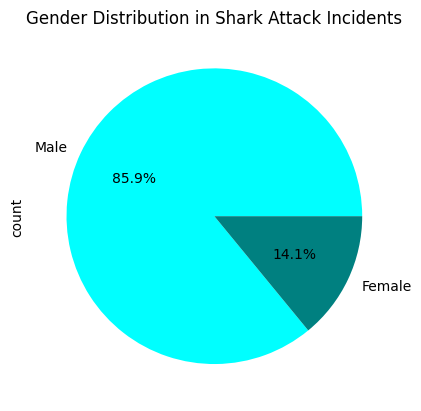

In [6]:
def tasty(df):
    shark = pd.read_csv(r"C:/Users/Marco/Desktop/IronHack/projects/Project_1/data/attacks.csv", encoding='latin1')    
    gender_attack = df['Sex'].value_counts()
    
    scientific_genders = ['Male', 'Female']
    df = df[df['Sex'].isin(scientific_genders)]

    df.loc[df['Sex'].notna(), 'Sex'] = df['Sex'].dropna()
    gender_counts = df['Sex'].value_counts()
    
    gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['cyan', 'teal'])
    plt.title('Gender Distribution in Shark Attack Incidents')
    plt.show()
    
tasty(df)


<h2> Have sharks entered a pro-vegan movement

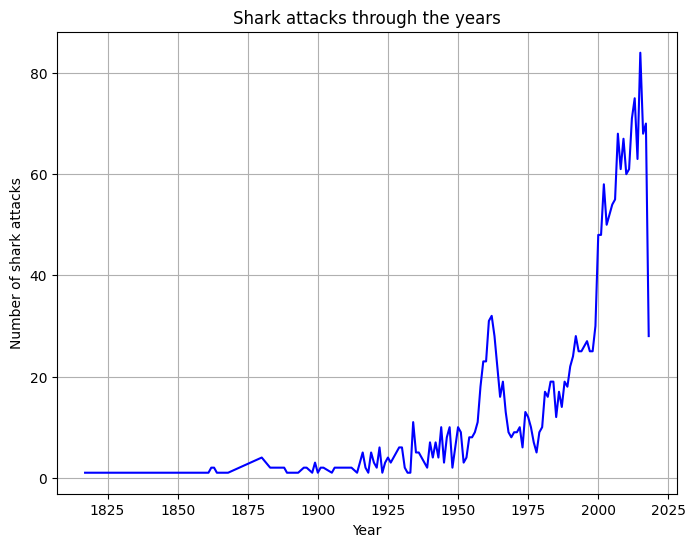

In [9]:
def vegan(df):
    shark = pd.read_csv(r"C:/Users/Marco/Desktop/IronHack/projects/Project_1/data/attacks.csv", encoding='latin1')    
    
    df = df[df['Year'] <= 2023]
    
    year_attack = df['Year'].value_counts().sort_index()
    df = df.sort_values(by='Year')
    
    plt.figure(figsize=(8, 6))
    year_attack.plot(kind='line', color= ['blue'])
    plt.xlabel('Year')
    plt.ylabel('Number of shark attacks')
    plt.title('Shark attacks through the years')
    plt.grid(True)
    
vegan(df)

<h2> Do sharks procrastinate their lunchtime

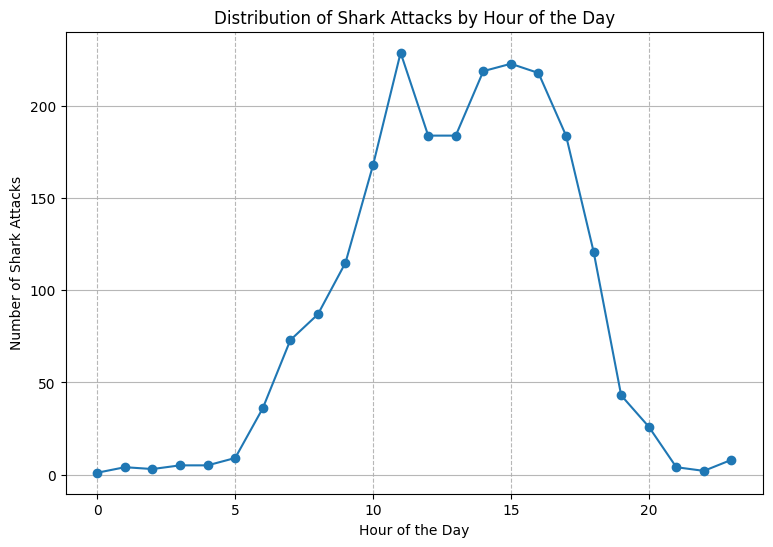

In [14]:
def procastinate(df):
    
    shark = pd.read_csv(r"C:/Users/Marco/Desktop/IronHack/projects/Project_1/data/attacks.csv", encoding='latin1')    
    
    df['Hour'] = df['Time'].str.extract(r'(\d{2})').astype(int)
    hourly_counts = df['Hour'].value_counts().sort_index()
    
    plt.figure(figsize=(9, 6))
    plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linestyle='-')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Shark Attacks')
    plt.title('Distribution of Shark Attacks by Hour of the Day')
    plt.grid(axis='y', linestyle='-', alpha=0.9)
    plt.grid(axis='x', linestyle='--', alpha=0.9)

    plt.show()

    
procastinate(df)

<h2> Do sharks like to bully humans?

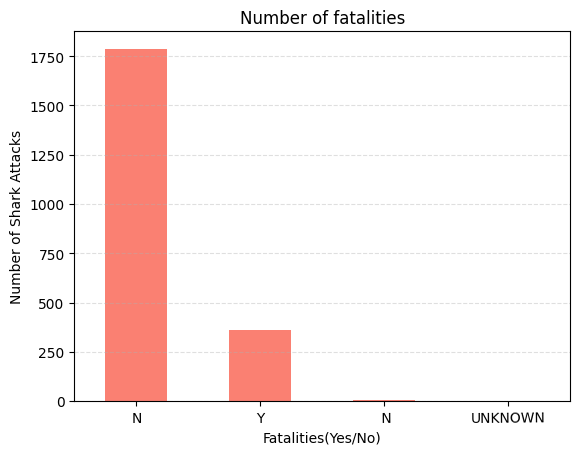

In [12]:
def death_test(df):
    
    shark = pd.read_csv(r"C:/Users/Marco/Desktop/IronHack/projects/Project_1/data/attacks.csv", encoding='latin1')  
    
    df["Fatal (Y/N)"].value_counts().plot(kind="bar",color="salmon",title="Number of fatalities")
    plt.xticks(rotation=0.5)
    plt.xlabel('Fatalities(Yes/No)')
    plt.ylabel('Number of Shark Attacks')
    plt.grid(axis='y', linestyle='--', alpha= 0.4)
    
death_test(df)


In [ ]:
"""
In this case as well we can observe that some of the data of the
column might have been wrong introduced. In this specific as the data
is so little and won't make any changes on the final result we can 
just keep the 'N' and 'Y' that have been written correctly in the data set.
Due to correcting later the graph before also corrected itself with the right values.
but lets leave it there as a reminder of how i found they were wrong values in the column that still had to deleted.

"""

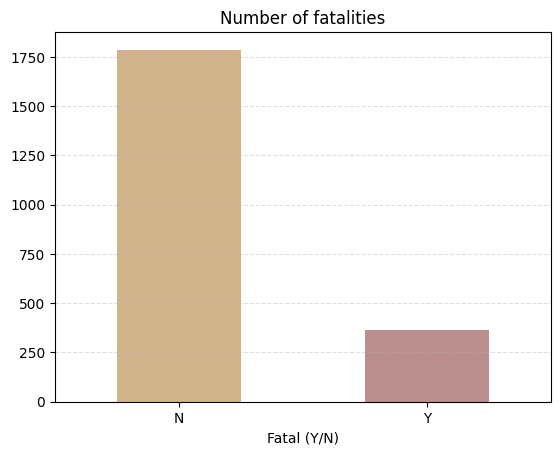

In [11]:
def death(df):
    shark = pd.read_csv(r"C:/Users/Marco/Desktop/IronHack/projects/Project_1/data/attacks.csv", encoding='latin1') 
    
    fatality_answrs = ['Y', 'N']
    df = df[df['Fatal (Y/N)'].isin(fatality_answrs)]
    
    df.loc[df['Fatal (Y/N)'].notna(),'Fatal (Y/N)'] = df['Fatal (Y/N)'].dropna()
    
    df["Fatal (Y/N)"].value_counts().plot(kind="bar",color=["tan" , "rosybrown"],title="Number of fatalities")
    plt.xticks(rotation=0.5)
    plt.grid(axis='y', linestyle='--', alpha= 0.4)
    
death(df)
    